# __Imbalance Learn__ 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('car_evaluation.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.outcome.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: outcome, dtype: int64

### Undersampling

we will take the class with the least datapoints and then the rest of the samples for other classes will have only that number of datapoints as the class with least datapoints

__Cons__
1. Data Loss

# Oversampling

We take the class with maximum datapoints and then for classes with lesser data we just randomly select samples and keep on coping untill we get datapoints for each class equal to number of datapoints for class with maximum datapoints

__Cons__
1. Due to repeated data overfitting

## __SMOTE__

- Sythetic Minority Oversampling technique
1. Variation of oversampling techique
2. Here instead of copying as done in oversampling we randomly select points from minority class and synthetically generate datapoints to be added to minority class thereby increasing number of datapoints to be equated to the majority class for balancing the dataset (well understood with KNN or K-means clustering in mind)
3. generating data points synthetically means having datapoints added to minority class where the generated datapoints are closer to minority class

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
df.buying = le.fit_transform(df.buying)
df.maint = le.fit_transform(df.maint)
df.lug_boot = le.fit_transform(df.lug_boot)
df.safety = le.fit_transform(df.safety)

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,3,3,2,2,2,1,unacc
1,3,3,2,2,2,2,unacc
2,3,3,2,2,2,0,unacc
3,3,3,2,2,1,1,unacc
4,3,3,2,2,1,2,unacc


### as seen from the value count of our outcome column we have an imbalanced dataset

In [9]:
X = df.iloc[:,:-1]
y = df.outcome

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# K Neighbour Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
from sklearn.metrics import accuracy_score, classification_report

In [14]:
y_predict = model.predict(X_test)

pd.crosstab(y_test, y_predict)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,101,1,18,0
good,12,5,2,0
unacc,12,0,350,0
vgood,9,0,0,9


In [15]:
accuracy_score(y_test, y_predict)

0.8959537572254336

In [16]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         acc       0.75      0.84      0.80       120
        good       0.83      0.26      0.40        19
       unacc       0.95      0.97      0.96       362
       vgood       1.00      0.50      0.67        18

    accuracy                           0.90       519
   macro avg       0.88      0.64      0.70       519
weighted avg       0.90      0.90      0.89       519



In [17]:
from imblearn.over_sampling import SMOTE

# Using SMOTE

In [18]:
smote = SMOTE()

In [20]:
y_train.value_counts()

unacc    848
acc      264
good      50
vgood     47
Name: outcome, dtype: int64

In [22]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [23]:
y_train_smote.value_counts()

good     848
unacc    848
acc      848
vgood    848
Name: outcome, dtype: int64

# Now we have balanced the data for our usage to optimize the model

In [24]:
model = KNeighborsClassifier()

model.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [25]:
y_predict = model.predict(X_test)

In [26]:
accuracy_score(y_test, y_predict)

0.7610789980732178

In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         acc       0.53      0.73      0.62       120
        good       0.35      0.95      0.51        19
       unacc       0.98      0.77      0.86       362
       vgood       0.63      0.67      0.65        18

    accuracy                           0.76       519
   macro avg       0.62      0.78      0.66       519
weighted avg       0.84      0.76      0.78       519



In [28]:
pd.crosstab(y_test, y_predict)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,88,21,7,4
good,1,18,0,0
unacc,70,12,277,3
vgood,6,0,0,12


<AxesSubplot:xlabel='col_0', ylabel='outcome'>

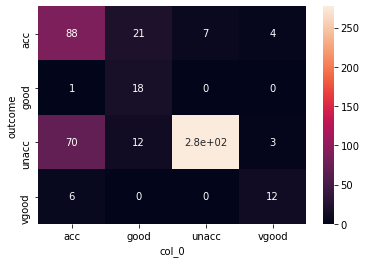

In [29]:
import seaborn as sns
sns.heatmap(pd.crosstab(y_test, y_predict), annot=True)

# Here we can see that the minority class suffered a lot before applying smote but now that behaviour has reduced but at the cost of majority class suffering

## on applying smote the accuracy score decreases but at the same time smote increases performance of minority classes to be much better. Accuracy score reduction is due to majority class suffering after applying smote